In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('frames.csv')


In [3]:
df


,Refs,Sims
0,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTGTCACTAGAGGACGCACGCTCTATTTTTTATCCATTGATGTCGC...
1,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTGTCTCAGAGGACGCACTCCATTTTTATGATCCATTGATGTCCCT...
2,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTGTCACTAGAGGACGCACGCTCTGATTTTTATGATCCATTGATGT...
3,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTTGACACTAGAGGACGCACGCTTATTTTTATGATCCATTGATGTC...
4,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TGTCACTAAGGATGCACGCTGTATTTTTATGATCCATTGATGTCCC...
...,...,...
967,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTGTCACTAGTAGGACGCACACTCTATTTTTATGATCCATTGATGT...
968,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTGTCACCTAGAGGACGCACGCTCTATTTTTATGATCACATTGATG...
969,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTGTCACTTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGT...
970,TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTC...,TTGACACTAGAGGACGCAGGCTCTATTTTTCTGATACCATTGATGT...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Sims'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 972/972 [00:01<00:00, 889.95it/s] 


100%|██████████| 972/972 [00:00<00:00, 53549.93it/s]


[52, 122, 232, 294, 284, 326, 341, 366, 349, 360, 382, 272, 245, 450, 405, 468, 385, 508, 409, 527, 413, 470, 513, 415, 568, 258, 97, 61, 132, 232, 599, 524, 635, 612, 632, 467, 447, 653, 469, 419, 632, 686, 569, 676, 592, 427, 335, 397, 708, 651, 718, 607, 637, 571, 735, 707, 716, 390, 268, 271, 429, 466, 374, 463, 746, 655, 542, 505, 539, 543, 695, 558, 518, 728, 754, 717, 576, 671, 477, 574, 623, 557, 657, 451, 478, 735, 771, 531, 600, 690, 568, 582, 707, 758, 762, 580, 617, 594, 620, 607, 602, 735, 724, 711, 675, 675, 653, 558, 414, 313, 0]


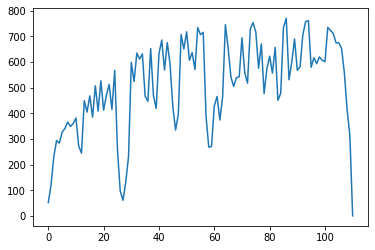

In [10]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)

In [11]:
import numpy as np


In [12]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [13]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

GCT ->  6
 -> TG 6
 -> GT 6
TT -> G 6
AG -> T 7
 -> GC 7
CC ->  9
GA ->  11
AA ->  12
TG ->  12
GT ->  14
CTAG ->  14
AC ->  15
TC ->  17
CG ->  18
GG ->  19
AT ->  20
TA ->  22
CA ->  23
GC ->  25
CT ->  27
AG ->  28
TT ->  30
A -> C 102
A -> T 118
C -> G 121
G -> C 126
G -> T 127
A -> G 131
C -> T 138
C -> A 144
T -> C 148
G -> A 151
T -> A 154
T -> G 156
A ->  323
 -> A 373
C ->  408
 -> T 461
 -> G 461
T ->  477
 -> C 545
G ->  583


In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


G -> T @ 33 6
A -> G @ 105 6
 -> G @ 42 6
 -> G @ 73 6
T -> C @ 80 6
T -> A @ 108 6
T -> A @ 27 6
 -> G @ 55 6
T -> C @ 98 6
 -> G @ 53 6
T -> A @ 30 6
 -> G @ 52 6
A -> G @ 51 6
T -> A @ 32 6
A -> C @ 9 6
 -> T @ 7 6
 -> T @ 6 6
T -> A @ 62 6
 -> T @ 18 6
 -> T @ 83 6
GC ->  @ 21 6
 -> T @ 82 6
G -> C @ 82 6
 -> T @ 102 6
 -> T @ 80 6
 -> G @ 95 6
 -> T @ 77 6
A ->  @ 42 6
 -> G @ 9 6
 -> T @ 76 6
 -> T @ 20 6
 -> G @ 82 6
T -> C @ 30 6
 -> G @ 81 6
 -> G @ 79 6
 -> G @ 76 6
GG ->  @ 89 6
 -> T @ 88 6
A -> C @ 25 6
A -> C @ 42 6
A -> C @ 51 6
 -> G @ 74 6
 -> T @ 58 6
 -> T @ 48 6
AG ->  @ 110 6
 -> C @ 14 6
C -> T @ 46 6
 -> C @ 58 6
 -> C @ 54 6
C -> T @ 23 6
G ->  @ 82 6
 -> C @ 42 6
 -> C @ 41 6
C -> T @ 17 6
C -> T @ 107 6
 -> C @ 37 6
C -> T @ 103 6
 -> C @ 26 6
 -> C @ 25 6
 -> A @ 28 6
G -> C @ 73 6
C -> G @ 70 6
 -> A @ 87 6
C -> G @ 57 6
TT ->  @ 80 6
C -> G @ 54 6
C -> G @ 52 6
 -> A @ 61 6
C -> G @ 36 6
C -> G @ 21 6
C -> A @ 97 6
C ->  @ 96 6
 -> A @ 27 6
 -> A @ 43 6
TT 

In [16]:
import matplotlib.pyplot as plt

In [17]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[54, 126, 79, 39, 54, 46, 59, 45, 50, 55, 59, 43, 58, 45, 51, 39, 46, 53, 58, 46, 51, 50, 57, 43, 43, 73, 72, 40, 30, 25, 64, 57, 46, 45, 53, 53, 42, 44, 49, 53, 47, 46, 47, 55, 41, 49, 54, 19, 69, 66, 46, 51, 56, 46, 57, 51, 39, 46, 69, 27, 33, 48, 48, 23, 68, 44, 38, 36, 44, 45, 52, 60, 36, 51, 59, 43, 46, 48, 56, 46, 52, 46, 41, 51, 42, 31, 40, 54, 39, 72, 47, 59, 57, 42, 53, 56, 32, 48, 32, 55, 47, 51, 49, 53, 49, 50, 47, 41, 58, 54, 435]


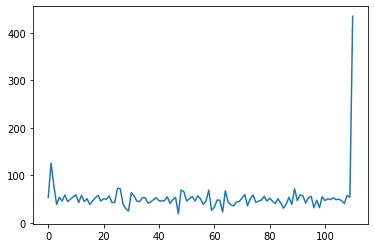

In [18]:
plt.plot(range(strand_len + 1), pos_counts)

In [19]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[16, 0, 0, 4, 0, 5, 6, 6, 3, 9, 4, 0, 5, 4, 7, 7, 5, 2, 6, 3, 6, 3, 7, 0, 3, 12, 0, 0, 0, 0, 8, 3, 3, 3, 7, 2, 7, 3, 5, 0, 4, 4, 5, 3, 3, 8, 4, 0, 6, 8, 5, 7, 10, 2, 4, 3, 3, 5, 6, 0, 2, 3, 0, 0, 11, 4, 4, 0, 4, 5, 1, 4, 1, 7, 5, 5, 6, 6, 4, 0, 6, 1, 6, 6, 4, 2, 2, 8, 6, 8, 7, 8, 4, 5, 4, 4, 4, 1, 0, 8, 3, 5, 6, 1, 5, 5, 1, 0, 7, 7, 1]


In [20]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


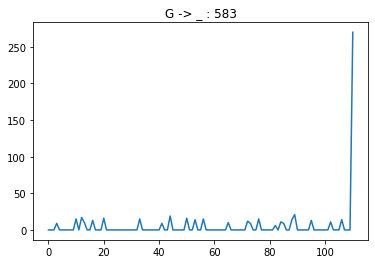

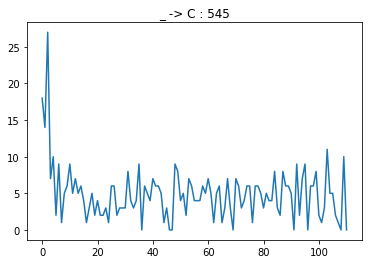

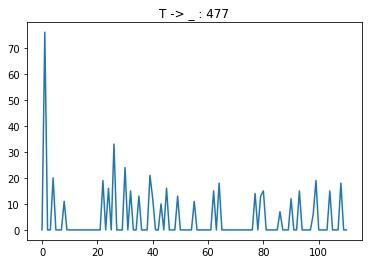

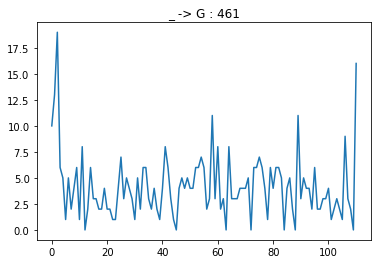

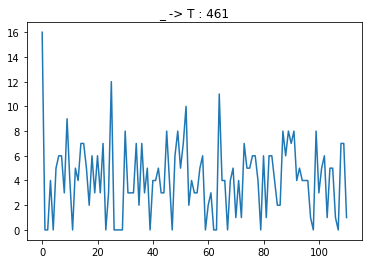

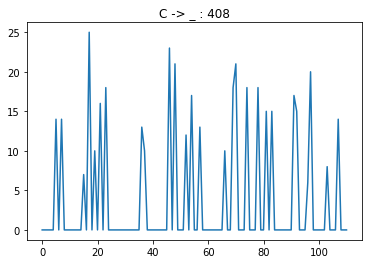

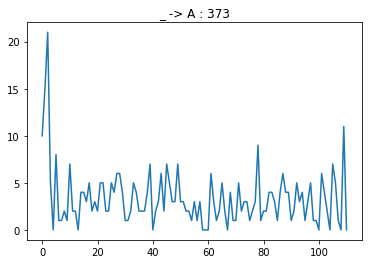

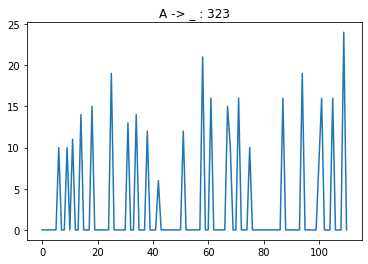

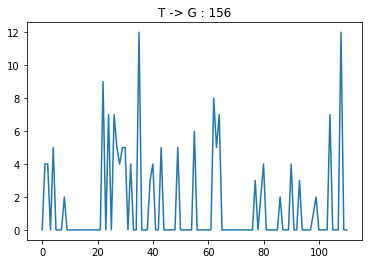

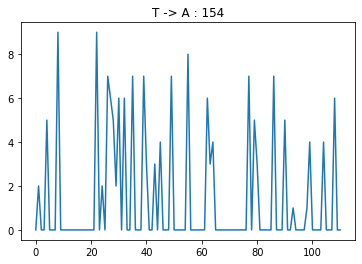

In [21]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [22]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)